In [51]:
# from qiskit.opflow import I, Z, X, Y, SparsePauliOp
import numpy as np
# from juqcs import Juqcs
# 假设有 3 台机器和 3 个操作
m = 3 # 机器数量
n = 2  # 操作数量
l = 1  # 用于表示 C_max 的二进制位数

# 处理时间矩阵 (例如)
p = np.array([[1, 2, 3],[3, 1, 2]])

# 常数
K1 = 20
P = 20

# 量子比特数量
num_qubits = n * m + l

In [52]:
#
def pauli_z_term(index, num_qubits):
    """初始化一个 Pauli-I 门的列表,指定索引 index 替换为 Pauli-Z 门"""
    paulis = ['I'] * num_qubits
    paulis[index] = 'Z'
    return ''.join(paulis)  # 将列表转化为字符串

def pauli_x_term(index, num_qubits):
    paulis = ['I'] * num_qubits
    paulis[index] = 'X'
    return ''.join(paulis)


In [53]:
from qiskit.quantum_info import Pauli, SparsePauliOp, PauliList

# 常数项
# constant_term = 1/2 * sum(2**h for h in range(l))
pauli_strings = []
cofficients = []
# 构建 Pauli-Z 项
z_terms = []
for h in range(l):
    coef = - 2**h / 2
    z_term = pauli_z_term(m * n + h, num_qubits)
    z_terms.append((coef, z_term))

# 从z_terms中提取Pauli字符串和系数
pauli_strings = [term[1] for term in z_terms]
coefficients = [term[0] for term in z_terms]
# 转换为 SparsePauliOp
paulis = [Pauli(label) for label in pauli_strings]
hamiltonian1 = SparsePauliOp.from_list(list(zip(pauli_strings, coefficients)))
print(hamiltonian1)

SparsePauliOp(['IIIIIIZ'],
              coeffs=[-0.5+0.j])


In [54]:
pauli_strings = []
cofficients = []
# 常数项
# constant_term1 = K1 * n * ((m / 2) - 1)**2
# pauli_strings.append('I'*num_qubits)
# cofficients.append(constant_term1)

# 线性项
x_terms = []
# coef_linear = -1 * K1 * (m / 2 - 1)
for i in range(n):
    for j in range(m):
        coef = -1 * K1 * (m - 1)/2
        x_term = pauli_z_term(i * m + j, num_qubits)
        pauli_strings.append(x_term)
        cofficients.append(coef)
        # linear_terms.append((coef, x_term))

# 二次项
# quadratic_terms = []
# coef_quadratic = K1 / 4
for i in range(n):
    coef = K1 / 4
    for j1 in range(m):
        for j2 in range(m):
            if j1 != j2:
                x_term1 = pauli_z_term(i * m + j1, num_qubits)
                x_term2 = pauli_z_term(i * m + j2, num_qubits)
                combined_op = ''.join(['I' if c1 == 'I' and c2 == 'I' else 'Z' if c1 == 'Z' or c2 == 'Z' else 'I'
                                           for c1, c2 in zip(x_term1, x_term2)])
                pauli_strings.append(combined_op)
                cofficients.append(coef)
            # quadratic_terms.append((coef, x_term1 + x_term2)) # 二次项的具体形式应该是每对 Zij 和 Zik 的组合

# 组合所有项
# pauli_strings = [term[1] for term in linear_terms + quadratic_terms]
# coefficients = [term[0] for term in linear_terms + quadratic_terms]
print(pauli_strings)
print(cofficients)
# 转换为 SparsePauliOp
paulis = [Pauli(label) for label in pauli_strings]
hamiltonian2 = SparsePauliOp.from_list(list(zip(pauli_strings, cofficients)))

print(hamiltonian2)

['ZIIIIII', 'IZIIIII', 'IIZIIII', 'IIIZIII', 'IIIIZII', 'IIIIIZI', 'ZZIIIII', 'ZIZIIII', 'ZZIIIII', 'IZZIIII', 'ZIZIIII', 'IZZIIII', 'IIIZZII', 'IIIZIZI', 'IIIZZII', 'IIIIZZI', 'IIIZIZI', 'IIIIZZI']
[-20.0, -20.0, -20.0, -20.0, -20.0, -20.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
SparsePauliOp(['ZIIIIII', 'IZIIIII', 'IIZIIII', 'IIIZIII', 'IIIIZII', 'IIIIIZI', 'ZZIIIII', 'ZIZIIII', 'ZZIIIII', 'IZZIIII', 'ZIZIIII', 'IZZIIII', 'IIIZZII', 'IIIZIZI', 'IIIZZII', 'IIIIZZI', 'IIIZIZI', 'IIIIZZI'],
              coeffs=[-20.+0.j, -20.+0.j, -20.+0.j, -20.+0.j, -20.+0.j, -20.+0.j,   5.+0.j,
   5.+0.j,   5.+0.j,   5.+0.j,   5.+0.j,   5.+0.j,   5.+0.j,   5.+0.j,
   5.+0.j,   5.+0.j,   5.+0.j,   5.+0.j])


In [55]:
# 初始化数组
pauli_strings = []
coefficients = []
x_terms = []
z_terms = []
# 线性和二次项
for j in range(m):
    # constant_term = -1/2*(np.sum(p[:, j]) - ( 2 ** l-1))
    # h_terms = []

    for i in range(n):
        coef =-1/2 * (np.sum(p[:, j]) - ( 2 ** l-1)) * p[i, j] * P
        x_term = pauli_z_term(i * m + j, num_qubits)
        x_terms.append((coef, x_term))
        # pauli_strings.append(x_term)
        # cofficients.append(coef)

    for h in range(l):
        coef = -1/2 * (np.sum(p[:, j]) - ( 2 ** l-1)) * - (2 ** h) * P
        z_term = pauli_z_term(m * n + h, num_qubits)
        # pauli_strings.append(z_term)
        # cofficients.append(coef)
        x_terms.append((coef,z_term))

    for i1 in range(n):
        for i2 in range(n):
            if i1 != i2:
                coef = 1/4 * p[i1, j] * p[i2, j] * P
                x_term1 = pauli_z_term(i1 * m + j, num_qubits)
                x_term2 = pauli_z_term(i2 * m + j, num_qubits)
                combined_op = ''.join(['I' if c1 == 'I' and c2 == 'I' else 'Z' if c1 == 'Z' or c2 == 'Z' else 'I'
                                           for c1, c2 in zip(x_term1, x_term2)])
                # pauli_strings.append(combined_op)
                # cofficients.append(coef)
                x_terms.append((coef, combined_op))
    for i in range(n):
        for h in range(l):
            coef = 1/4 * -2 * p[i,j] * 2 ** h * P
            x_term = pauli_z_term(i * m + j, num_qubits)
            z_term = pauli_z_term(m * n + h, num_qubits)
            combined_op = ''.join(['I' if c1 == 'I' and c2 == 'I' else 'Z' if c1 == 'Z' or c2 == 'Z' else 'I'
                                           for c1, c2 in zip(x_term, z_term)])
            # pauli_strings.append(combined_op)
            # cofficients.append(coef)
            x_terms.append((coef, combined_op))
    for h1 in range(l):
        for h2 in range(l):
            if h1 != h2:
                coef = 1/4 * 2 ** h1 * 2 ** h2 * P
                z_term1 = pauli_z_term(m * n + h1, num_qubits)
                z_term2= pauli_z_term(m * n + h2, num_qubits)
                combined_op = ''.join(['I' if c1 == 'I' and c2 == 'I' else 'Z' if c1 == 'Z' or c2 == 'Z' else 'I'
                                           for c1, c2 in zip(z_term1, z_term2)])
                # pauli_strings.append(combined_op)
                # cofficients.append(coef)
                x_terms.append((coef, combined_op))
pauli_strings = [term[1] for term in x_terms]
coefficients = [term[0] for term in x_terms]
# 转换为 SparsePauliOp
paulis = [Pauli(label) for label in pauli_strings]
hamiltonian3 = SparsePauliOp.from_list(list(zip(pauli_strings, coefficients)))

print(hamiltonian3)

SparsePauliOp(['ZIIIIII', 'IIIZIII', 'IIIIIIZ', 'ZIIZIII', 'ZIIZIII', 'ZIIIIIZ', 'IIIZIIZ', 'IZIIIII', 'IIIIZII', 'IIIIIIZ', 'IZIIZII', 'IZIIZII', 'IZIIIIZ', 'IIIIZIZ', 'IIZIIII', 'IIIIIZI', 'IIIIIIZ', 'IIZIIZI', 'IIZIIZI', 'IIZIIIZ', 'IIIIIZZ'],
              coeffs=[ -30.+0.j,  -90.+0.j,   30.+0.j,   15.+0.j,   15.+0.j,  -10.+0.j,
  -30.+0.j,  -40.+0.j,  -20.+0.j,   20.+0.j,   10.+0.j,   10.+0.j,
  -20.+0.j,  -10.+0.j, -120.+0.j,  -80.+0.j,   40.+0.j,   30.+0.j,
   30.+0.j,  -30.+0.j,  -20.+0.j])


In [56]:
cost_hamiltonian = hamiltonian1 + hamiltonian2 + hamiltonian3
print(cost_hamiltonian)

SparsePauliOp(['IIIIIIZ', 'ZIIIIII', 'IZIIIII', 'IIZIIII', 'IIIZIII', 'IIIIZII', 'IIIIIZI', 'ZZIIIII', 'ZIZIIII', 'ZZIIIII', 'IZZIIII', 'ZIZIIII', 'IZZIIII', 'IIIZZII', 'IIIZIZI', 'IIIZZII', 'IIIIZZI', 'IIIZIZI', 'IIIIZZI', 'ZIIIIII', 'IIIZIII', 'IIIIIIZ', 'ZIIZIII', 'ZIIZIII', 'ZIIIIIZ', 'IIIZIIZ', 'IZIIIII', 'IIIIZII', 'IIIIIIZ', 'IZIIZII', 'IZIIZII', 'IZIIIIZ', 'IIIIZIZ', 'IIZIIII', 'IIIIIZI', 'IIIIIIZ', 'IIZIIZI', 'IIZIIZI', 'IIZIIIZ', 'IIIIIZZ'],
              coeffs=[  -0.5+0.j,  -20. +0.j,  -20. +0.j,  -20. +0.j,  -20. +0.j,  -20. +0.j,
  -20. +0.j,    5. +0.j,    5. +0.j,    5. +0.j,    5. +0.j,    5. +0.j,
    5. +0.j,    5. +0.j,    5. +0.j,    5. +0.j,    5. +0.j,    5. +0.j,
    5. +0.j,  -30. +0.j,  -90. +0.j,   30. +0.j,   15. +0.j,   15. +0.j,
  -10. +0.j,  -30. +0.j,  -40. +0.j,  -20. +0.j,   20. +0.j,   10. +0.j,
   10. +0.j,  -20. +0.j,  -10. +0.j, -120. +0.j,  -80. +0.j,   40. +0.j,
   30. +0.j,   30. +0.j,  -30. +0.j,  -20. +0.j])


In [57]:
# 初始化数组
pauli_strings = []
coefficients = []
x_terms = []
z_terms = []
for i in range(num_qubits):
    coef = 1
    x_term = pauli_x_term(i,num_qubits)
    x_terms.append((coef, x_term))
# # 设置前 n*m 个量子比特为 XY 混合器
# xy_terms = []
# for i in range(n):
#     for j in range(m):
#         # 确定量子比特对 (i * m + j) 和 (i * m + j + 1)
#         if j < m - 1:
#             coef = 0.5  # XY 项的系数
#
#             # 生成 Pauli-X 和 Pauli-Y 操作的字符串
#             x_term = 'I' * (i * m + j) + 'X' + 'I' * (num_qubits - i * m - j - 1)
#             y_term = 'I' * (i * m + j) + 'Y' + 'I' * (num_qubits - i * m - j - 1)
#             x_term_next = 'I' * (i * m + j + 1) + 'X' + 'I' * (num_qubits - i * m - j - 2)
#             y_term_next = 'I' * (i * m + j + 1) + 'Y' + 'I' * (num_qubits - i * m - j - 2)
#
#             # 组合成 XY 项
#             xy_term_x = x_term[:i * m + j] + 'X' + x_term_next[i * m + j + 1:]
#             xy_term_y = y_term[:i * m + j] + 'Y' + y_term_next[i * m + j + 1:]
#
#             # 将生成的 XY 项添加到 xy_terms 中
#             xy_terms.append((coef, xy_term_x))
#             xy_terms.append((coef, xy_term_y))

# 提取所有的 Pauli 字符串和系数
pauli_strings = [term[1] for term in  x_terms ]
coefficients = [term[0] for term in  x_terms ]

# 转换为 SparsePauliOp
paulis = [Pauli(label) for label in pauli_strings]
mixer_hamiltonian = SparsePauliOp.from_list(list(zip(pauli_strings, coefficients)))

print(mixer_hamiltonian)

SparsePauliOp(['XIIIIII', 'IXIIIII', 'IIXIIII', 'IIIXIII', 'IIIIXII', 'IIIIIXI', 'IIIIIIX'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


In [58]:
def invert_counts(s):
    return s[::-1]

In [59]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import Aer, transpile, assemble, QuantumCircuit, execute


# 定义成本函数
def cost_function(params, n, m, l, K1, P, p):
    beta, gamma = params[:len(params)//2], params[len(params)//2:]
    num_qubits = n * m + l
    qc = QuantumCircuit(num_qubits, num_qubits)  # 添加经典寄存器

    # 初始化量子态到 |+> 态
    qc.h(range(n * m + l))

    for g, b in zip(gamma, beta):
        # 应用问题哈密顿量
        qc.append(PauliEvolutionGate(cost_hamiltonian, g), list(range(num_qubits)))
        # 应用混合哈密顿量
        qc.append(PauliEvolutionGate(mixer_hamiltonian, b), list(range(num_qubits)))

    # print(qc)
    # 模拟电路
    # 添加测量指令
    qc.measure(range(num_qubits), range(num_qubits))
    backend = Aer.get_backend('qasm_simulator')
    # qc = transpile(qc, backend)
    # qobj = assemble(qc, shots=10000)
    # result = backend.run(qobj).result()
    result = execute(qc, backend, seed_simulator=10, shots=10000).result()
    counts = result.get_counts(qc)
    # 计算期望值
    expectation = 0
    for bitstring, count in counts.items():
        bitstring = invert_counts(bitstring)
        prob = count / 10000
        z_h = np.array([int(bit) for bit in bitstring[(n*m):]])
        x_ij = np.array([int(bit) for bit in bitstring[:(n*m)]]).reshape(n, m)

        E1 = np.sum([2 ** h * z for h, z in enumerate(z_h)])
        E2 = K1 * np.sum([(np.sum(x_ij[i]) - 1) ** 2 for i in range(n)])
        # alpha_s = np.max([0, np.sum(x_ij * p) - np.sum([2 ** h * z for h, z in enumerate(z_h)])])
        E3 = 0
        for j in range(m):

            sum_xp = np.sum([x_ij[i][j] * p[i][j] for i in range(n)])

            sum_zh = np.sum([2**h * z_h[h] for h in range(l)])

            max_value = max(0, sum_xp - sum_zh)

            E3 += P * (max_value)**2
        E = E1 + E2 + E3
        expectation += E * prob
    return expectation, counts

In [60]:
# from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
# from qiskit.opflow import PauliSumOp
#
# # 使用 NumPyEigensolver 计算基态能量
# numpy_solver = NumPyMinimumEigensolver()
# result = numpy_solver.compute_minimum_eigenvalue(operator=PauliSumOp(cost_hamiltonian))
# # 获取基态能量
# ref_value = result.eigenvalue.real
# print(f"Reference value: {ref_value:.5f}")

Reference value: -360.50000


C:\Users\18330\AppData\Local\Temp\ipykernel_25296\1698585709.py:6: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  result = numpy_solver.compute_minimum_eigenvalue(operator=PauliSumOp(cost_hamiltonian))


寻找最优演化时间

In [61]:
# 循环演化时间的不同值
time = np.linspace(0.1, 50, 300)
energies = []
for p1 in [3, 4]:
    energy = []
    for t_max in time:

        dt = t_max / p1
        t = dt * (np.arange(1, p1 + 1) - 0.5)
        gamma = (t / t_max) * dt
        beta = (1 - (t / t_max)) * dt
        x = np.concatenate((beta, gamma))
        expectation, _ = cost_function(x, n, m, l, K1, P, p)
        energy.append(expectation)

    energies.append(energy)

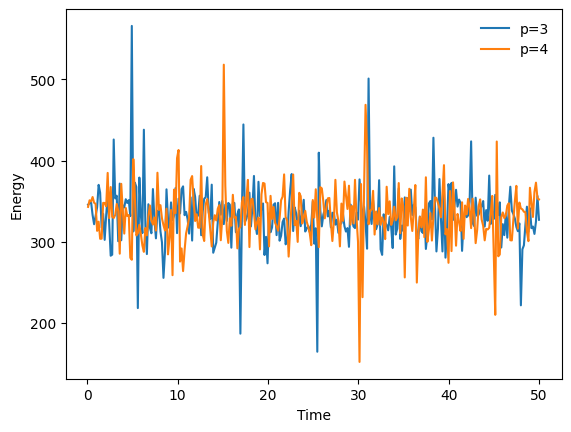

In [62]:
from matplotlib import pyplot as plt
plt.plot(time, energies[0], label="p=3")
plt.plot(time, energies[1], label="p=4")
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend(frameon=False)

In [66]:
# # 找到能量期望值最小的时间索引
idx = np.argmin(energies[1])
# 使用该索引来确定最优的演化时间
t_max = time[idx]
# 输出最优演化时间及其对应的近似比
print(f'Optimal evolution time is {t_max} with an approximation ratio of {energies[1][idx]}')

Optimal evolution time is 30.140133779264215 with an approximation ratio of 152.15219999999994


In [67]:
from qiskit_algorithms.optimizers import COBYLA, SPSA


# 优化 QAOA 参数
def optimize_qaoa(n, m, l, K1, P, p, params):
    def objective(params):
        expectation, _ = cost_function(params, n, m, l, K1, P, p)

        return expectation

    optimizer = SPSA(maxiter=1000, trust_region=True)
    # params = np.random.rand(2 * p_max) * 2 * np.pi
    result = optimizer.minimize(fun=objective, x0=params)

    return result

In [68]:
# Fix initial beta and gamma values
p1 = 4
dt = t_max / p1
t = dt * (np.arange(1, p1 + 1) - 0.5)
gamma = (t / t_max) * dt
beta = (1 - (t / t_max)) * dt
x0 = np.concatenate((beta, gamma))

In [69]:
result = optimize_qaoa(n, m, l, K1, P, p, x0)
optimal_params = result.x

# 计算最终的能量
energy, counts = cost_function(result.x, n, m, l, K1, P, p)
sorted_dict = {item[0][::-1]: item[1] for item in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
print("Final expectation value:", energy)
print("Final measurement counts:", sorted_dict)

Final expectation value: 366.63029999999986
Final measurement counts: {'0011011': 1187, '1011011': 660, '0111111': 610, '0000000': 581, '1100100': 490, '1001001': 391, '0010010': 354, '1010010': 343, '0000010': 240, '0001000': 203, '0001001': 163, '0101101': 156, '1001011': 149, '0111011': 135, '0001010': 135, '0110110': 134, '0011010': 134, '1100110': 127, '1110110': 126, '0011111': 118, '0010011': 113, '0001011': 110, '1011010': 104, '0101111': 104, '1011001': 101, '1001010': 101, '1000001': 93, '1011101': 93, '1110011': 92, '1111110': 90, '1000010': 89, '0100000': 81, '1110010': 73, '1010001': 72, '1101100': 72, '1010000': 70, '1011111': 68, '1101101': 61, '0000100': 60, '1101111': 59, '1101110': 53, '0110010': 53, '0001111': 50, '0110101': 50, '0010110': 48, '1110100': 47, '1101011': 47, '1100010': 46, '1001000': 45, '1110111': 45, '0011001': 42, '0100101': 39, '1100011': 39, '1011000': 39, '0111101': 39, '1100101': 38, '1000000': 38, '1010100': 36, '0101011': 36, '1111101': 35, '0

In [73]:
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
gamma = np.linspace(0, 2*np.pi, 100)
beta = np.linspace(0, np.pi, 100)
prefix = 'data_'
suffix = '_portfolio_qaoa_p1.dat'
preprefix = ".\data\\"
filename = preprefix + prefix+suffix

for x1 in gamma:
     for x2 in beta:
         x = {}
         x = np.insert(x,0,beta)
         x = np.insert(x,1,gamma)
         expectation, _ = cost_function(x, n, m, l, K1, P, p)
         f = open(filename, 'a')
         f.write(str(x1) + ' ' + str(x2)+ ' ' + str(expectation)+ "\n")
         f.write("\n")
         f.close()

# # 绘制三维图-获取数据
X1, X2 = np.meshgrid(gamma, beta)
data = np.loadtxt(filename)
expectation = data[:, 2]
# print(z)
m = int(np.sqrt(len(expectation)))
Z = matrix = expectation.reshape((m, m))

# 1. 创建三维图像
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#绘制三维图像
ax.plot_surface(X1, X2, Z, cmap='viridis')
#添加轴标签
font = FontProperties(size =16)
ax.set_xlabel('gamma',fontproperties = font)
ax.set_ylabel('beta',fontproperties = font)
ax.set_zlabel('能量值',fontproperties = font)
plt.savefig('.\data\\energy_3D_2.png', format='png')
plt.show()
#设置视角
ax.view_init(elev=30, azim=45)
fig.set_size_inches(12/2.54,12/2.54)

# 2. 绘制填充等高线图
CS = plt.contourf(X1, X2, Z)
# CS = plt.contour(X1, X2, Z)
plt.colorbar(CS)
plt.xlabel('gamma')
plt.ylabel('beta')
plt.savefig('.\data\\energy_contour_2.png', format='png')
plt.show()

CircuitError: 'The amount of qubit(201)/clbit(0) arguments does not match the gate expectation (7).'

In [ ]:
import time

# 运行优化
# p_max = 6  # 最大层数

startTime = time.time()
ansatz_final = object()
init_point = np.array([])
counts = {}
min_energy = 0
final_result = object()
for p1 in range(1, 5):
    min_energy = 10000
    for k in range(300):
        print('第：', p1, '层', ' ', '第', k, '个参数')
        init_point_temp = init_point
        beta_p = np.random.uniform(0, np.pi)
        gamma_p = np.random.uniform(0,  2 * np.pi)
        if k >0:
            init_point_temp = np.delete(init_point_temp, 2 * p1 - 1)
            init_point_temp = np.delete(init_point_temp, p1 - 1)
        init_point_temp = np.insert(init_point_temp, p1 - 1, beta_p)
        init_point_temp = np.insert(init_point_temp, 2 * p1 - 1, gamma_p)
        # 创建参数向量
        # print("init_point_temp"+ init_point_temp)
        result = optimize_qaoa(n, m, l, K1, P, p, init_point_temp)

        # print(result.x)
        optimal_params = result.x

        # 计算最终的能量
        energy, counts_temp = cost_function(result.x, n, m, l, K1, P, p)
        # 寻找这20对点中最优的参数
        if min_energy > energy:
            min_energy = energy
            init_point = optimal_params
            counts = counts_temp
            final_result = result
endTime = time.time()
# params = np.random.rand(2 * p_max,2*np.pi)
# result = optimize_qaoa(n, m, l, K1, P, p, params)

KeyboardInterrupt: 

In [ ]:
# 输出结果
print("运行时间：",endTime - startTime)
print("Optimal parameters:", final_result.x)
print("Optimal value:", final_result.fun)
# 使用最优参数运行量子电路并输出测量结果
final_expectation, final_counts = cost_function(final_result.x, n, m, l, K1, P, p)
# sorted_dict = dict(sorted(final_counts.items(), key=lambda item: item[1], reverse=True))
sorted_dict = {item[0][::-1]: item[1] for item in sorted(final_counts.items(), key=lambda item: item[1], reverse=True)}
print("Final expectation value:", final_expectation)
print("Final measurement counts:", sorted_dict)

In [39]:
expectation = 0

bitstring = "1000101"

z_h = np.array([int(bit) for bit in bitstring[(n*m):]])
x_ij = np.array([int(bit) for bit in bitstring[:(n*m)]]).reshape(n, m)

# alpha_s = np.max([0, np.sum(x_ij * p) - np.sum([2 ** h * z for h, z in enumerate(z_h)])])
E3 = 0
for j in range(m):
    # 计算 ∑_{i=1}^{n} x_{ij} p_{ij}
    sum_xp = np.sum([x_ij[i][j] * p[i][j] for i in range(n)])

    # 计算 ∑_{h=0}^{l-1} 2^h * z_h
    sum_zh = np.sum([2**h * z_h[h] for h in range(l)])

    # 计算 max{0, sum_xp - sum_zh}
    max_value = max(0, sum_xp - sum_zh)

    # 累加 P * (max_value)^2
    E3 += P * (max_value)**2
# E =  np.sum([2 ** h * z for h, z in enumerate(z_h)]) + K1 * np.sum([(np.sum(x_ij[i]) - 1) ** 2 for i in range(n)]) + E3
E0 = np.sum([2 ** h * z for h, z in enumerate(z_h)])
E1 = K1 * np.sum([(np.sum(x_ij[i]) - 1) ** 2 for i in range(n)])
E =  E0 + E1 + E3
# expectation += E * prob
print(E0)
print(E1)
print(E3)
print(E)

1
0
0
1
